<a href="https://colab.research.google.com/github/rddelarosa/APM1110/blob/main/SA1_Dela_Rosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1> <b>SA 1

 <h3> <b> No. 1

In [13]:
calculate_defective_probability <- function() {
  repeat {
    x1 <- as.numeric(readline("Enter x1 (0.10 to 0.40) [Category Share]: "))
    if (is.na(x1) || x1 < 0.10 || x1 > 0.40) {
      message("Invalid input: x1 must be between 0.10 and 0.40.")
      next
    }

    x2 <- as.numeric(readline("Enter x2 (0.10 to 0.40) [Category Share]: "))
    if (is.na(x2) || x2 < 0.10 || x2 > 0.40) {
      message("Invalid input: x2 must be between 0.10 and 0.40.")
      next
    }

    x3 <- 1 - (x1 + x2)
    if (x3 < 0.10 || x3 > 0.40) {
      message("Invalid input: The calculated x3 value (1 - x1 - x2) is ", x3,". x3 must be between 0.10 and 0.40. Adjust x1 and x2 accordingly.\n")
      next
    }
    break
  }

  repeat {
    y1 <- as.numeric(readline("Enter y1 (0.01 to 0.05) [Defect Rate of x1]: "))
    if (is.na(y1) || y1 < 0.01 || y1 > 0.05) {
      message("Invalid input: y1 must be between 0.01 and 0.05.")
      next
    }

    y2 <- as.numeric(readline("Enter y2 (0.01 to 0.05) [Defect Rate of x2]: "))
    if (is.na(y2) || y2 < 0.01 || y2 > 0.05) {
      message("Invalid input: y2 must be between 0.01 and 0.05.")
      next
    }

    y3 <- 0.12 - (y1 + y2)
    if (y3 < 0.01 || y3 > 0.05) {
      message("Invalid input: The calculated y3 value (1 - y1 - y2) is ", y3,". y3 must be between 0.10 and 0.40. Adjust y1 and y2 accordingly.\n")
      next
    }
    break
  }

  probability_defective <- x1 * y1 + x2 * y2 + x3 * y3

  cat("\nInputted Values:\n")
  cat("x1:", x1, "\nx2:", x2, "\nx3:", x3, "\n\n")
  cat("y1:", y1, "\ny2:", y2, "\ny3:", y3, "\n\n")
  cat("Probability of a defective product:", probability_defective, "or", probability_defective*100, "%")
}

calculate_defective_probability()


Enter x1 (0.10 to 0.40) [Category Share]: 0.3
Enter x2 (0.10 to 0.40) [Category Share]: 0.4
Enter y1 (0.01 to 0.05) [Defect Rate of x1]: 0.03
Enter y2 (0.01 to 0.05) [Defect Rate of x2]: 0.04

Inputted Values:
x1: 0.3 
x2: 0.4 
x3: 0.3 

y1: 0.03 
y2: 0.04 
y3: 0.05 

Probability of a defective product: 0.04 or 4 %

 <h3> <b> No. 2

Choose: 1 for Univariate, 2 for Bivariate: 1
Enter values of X (space-separated, e.g., 1 2 3 4 5): 2 3 8 5 7
Enter corresponding probabilities (space-separated, must sum to 1, e.g., 0.1 0.2 0.3 0.2 0.2): 0.2 0.1 0.1 0.2 0.4


Mean: 5.3
Variance: 4.61



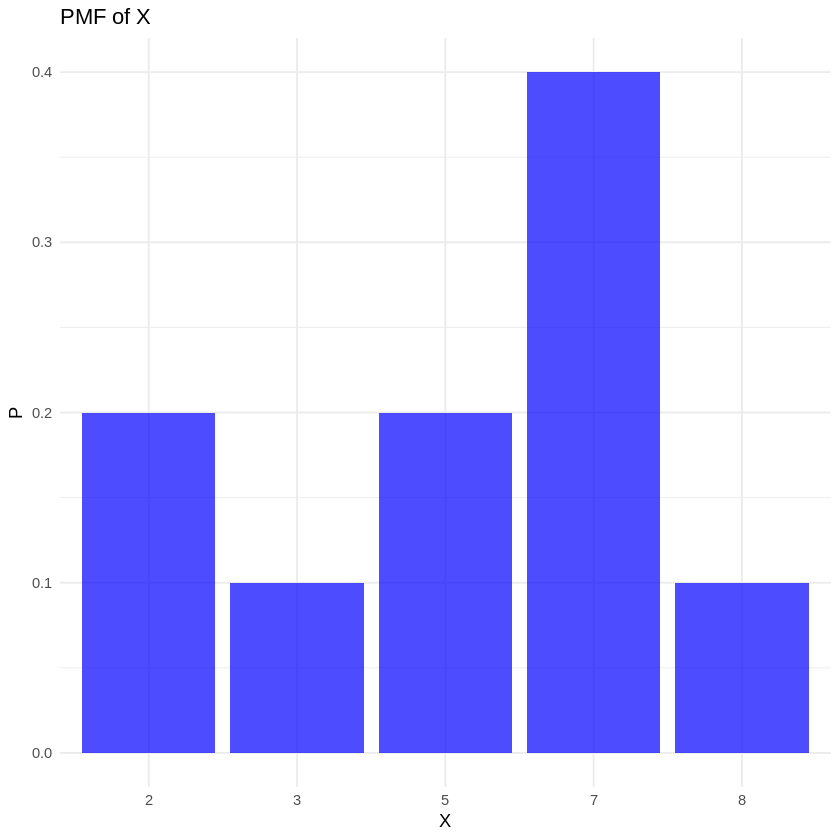

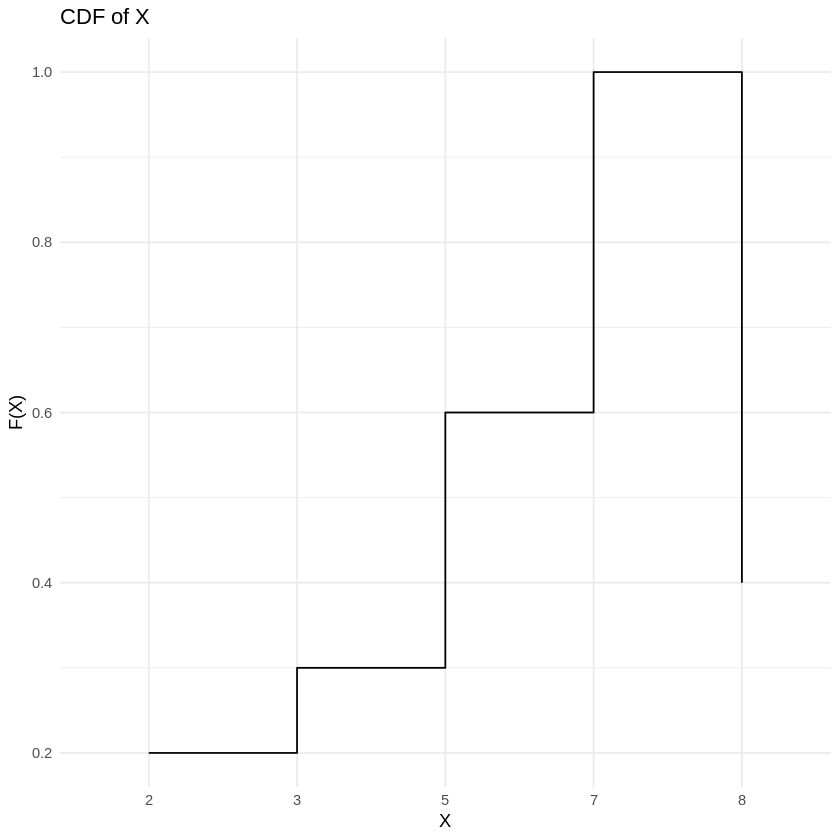

In [23]:
library(ggplot2)
library(dplyr)

check_prob <- function(prob_vals) {
  if (any(prob_vals < 0 | prob_vals > 1) || abs(sum(prob_vals) - 1) > 1e-6) {
    stop("Error: Probabilities must be between 0 and 1 and sum to 1.")
  }
}

plot_distribution <- function(dist_df, axis_label) {
  dist_df$cumulative_prob <- cumsum(dist_df$probability)

  pmf_plot <- ggplot(dist_df, aes(x = factor(value_set), y = probability)) +
    geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
    labs(title = paste("PMF of", axis_label), x = axis_label, y = "P") +
    theme_minimal()
  print(pmf_plot)

  cdf_plot <- ggplot(dist_df, aes(x = factor(value_set), y = cumulative_prob, group = 1)) +
    geom_step() +
    labs(title = paste("CDF of", axis_label), x = axis_label, y = "F(X)") +
    theme_minimal()
  print(cdf_plot)
}

# Univariate Analysis
single_var_analysis <- function() {
  value_set <- as.numeric(strsplit(readline("Enter values of X (space-separated, e.g., 1 2 3 4 5): "), " ")[[1]])
  prob_vals <- as.numeric(strsplit(readline("Enter corresponding probabilities (space-separated, must sum to 1, e.g., 0.1 0.2 0.3 0.2 0.2): "), " ")[[1]])

  check_prob(prob_vals)
  avg_value <- sum(value_set * prob_vals)
  deviation_value <- sum((value_set - avg_value)^2 * prob_vals)

  message("Mean: ", avg_value, "\nVariance: ", deviation_value)
  plot_distribution(data.frame(value_set = value_set, probability = prob_vals), "X")
}

# Bivariate Analysis
dual_var_analysis <- function() {
  set_x <- as.numeric(strsplit(readline("Enter values of X (space-separated, e.g., 1 2): "), " ")[[1]])
  set_y <- as.numeric(strsplit(readline("Enter values of Y (space-separated, e.g., 3 4): "), " ")[[1]])
  joint_probs <- as.numeric(strsplit(readline("Enter corresponding joint probabilities as a matrix (row-wise, space-separated, must sum to 1, e.g., 0.2 0.3 0.3 0.2): "), " ")[[1]])

  check_prob(joint_probs)
  joint_df <- expand.grid(X_var = set_x, Y_var = set_y) %>% mutate(PXY = joint_probs)

  marginal_x <- joint_df %>% group_by(X_var) %>% summarize(PX = sum(PXY))
  marginal_y <- joint_df %>% group_by(Y_var) %>% summarize(PY = sum(PXY))

  message("Marginal Distribution of X:")
  print(marginal_x)

  message("Marginal Distribution of Y:")
  print(marginal_y)

  joint_df <- joint_df %>% left_join(marginal_x, by = "X_var") %>% mutate(P_Y_given_X = PXY / PX)
  message("Conditional Distribution P(Y|X):")
  print(joint_df %>% select(X_var, Y_var, P_Y_given_X))

  mean_xval <- sum(marginal_x$X_var * marginal_x$PX)
  var_xval <- sum((marginal_x$X_var - mean_xval)^2 * marginal_x$PX)
  mean_yval <- sum(marginal_y$Y_var * marginal_y$PY)
  var_yval <- sum((marginal_y$Y_var - mean_yval)^2 * marginal_y$PY)

  message("Mean of X: ", mean_xval, "\nVariance of X: ", var_xval)
  message("Mean of Y: ", mean_yval, "\nVariance of Y: ", var_yval)

  plot_distribution(marginal_x, "X")
  plot_distribution(marginal_y, "Y")
}

# Main Menu
repeat {
  user_choice <- as.numeric(readline("Choose: 1 for Univariate, 2 for Bivariate: "))
  if (user_choice == 1) {
    single_var_analysis()
    break
  } else if (user_choice == 2) {
    dual_var_analysis()
    break
  } else {
    message("Invalid choice. Please enter 1 or 2.")
  }
}


 <h3> <b> No. 3

Mean of Searches: 1.6612 
Variance of Searches: 1.104725 
Conditional Mean (X > 3): 1.643533 
Conditional Variance (X > 3): 1.16499 
P(X = 4 | X > 3): 0.6182965 
P(X = 1): 0.6045 
P(X = 5 | X > 3): 0.2287066 
P(X = 2): 0.234 


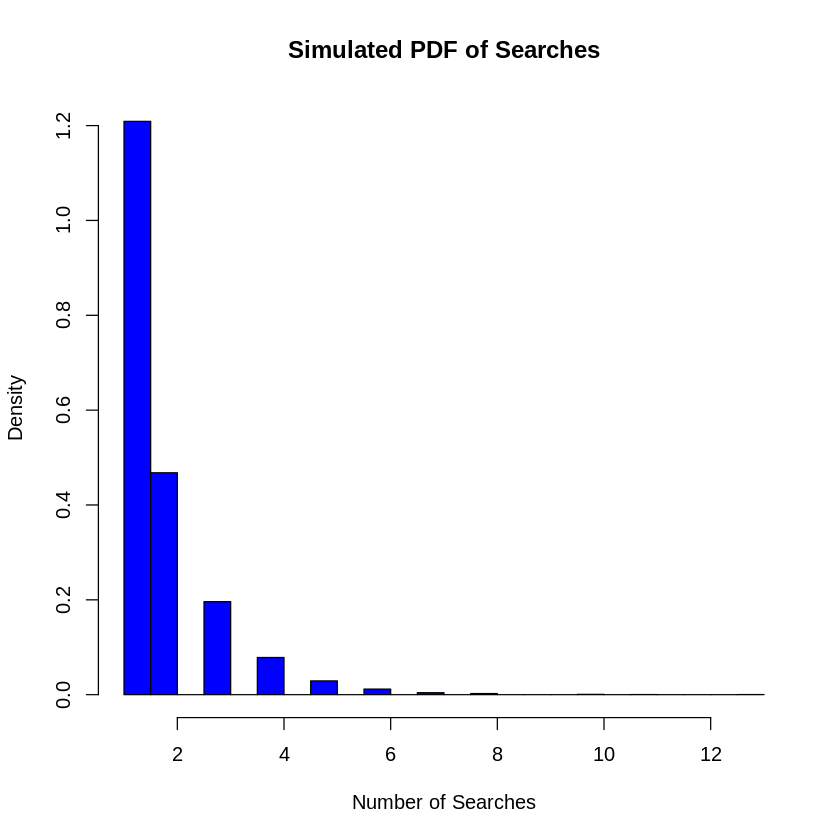

In [24]:
# Set seed for reproducibility
set.seed(123)

# Number of simulations
n_sim <- 10000

# Probability of finding the key phrase in a site
p <- 0.6

# Generate the number of searches needed to find the key phrase
searches <- rgeom(n_sim, p) + 1  # Geometric distribution (X ~ Geo(p)), shifted by 1

# Plot simulated probability density function (pdf)
hist(searches, probability = TRUE, breaks = 30, main = "Simulated PDF of Searches", xlab = "Number of Searches", col = "blue")

# Calculate mean and variance
mean_searches <- mean(searches)
var_searches <- var(searches)

cat("Mean of Searches:", mean_searches, "\n")
cat("Variance of Searches:", var_searches, "\n")

# Simulated conditional distribution given X > 3
cond_searches <- searches[searches > 3] - 3  # Shifted to start from 1

# Calculate conditional mean and variance
mean_cond <- mean(cond_searches)
var_cond <- var(cond_searches)

cat("Conditional Mean (X > 3):", mean_cond, "\n")
cat("Conditional Variance (X > 3):", var_cond, "\n")

# Verify Markov memoryless property
prob_X4_given_X3 <- sum(searches == 4) / sum(searches > 3)
prob_X1 <- sum(searches == 1) / n_sim

prob_X5_given_X3 <- sum(searches == 5) / sum(searches > 3)
prob_X2 <- sum(searches == 2) / n_sim

cat("P(X = 4 | X > 3):", prob_X4_given_X3, "\n")
cat("P(X = 1):", prob_X1, "\n")

cat("P(X = 5 | X > 3):", prob_X5_given_X3, "\n")
cat("P(X = 2):", prob_X2, "\n")
